In [1]:
import pandas as pd
import os

path = "D:\\00. projects\\GAS5_CP\data\\"
file1 = "공격성_1_0724_masked_embed"
file2 = "공격성&반복_0_0724_masked_embed"

pd.set_option("display.max_column", 30)
data = pd.read_json(os.path.join(path, file1) + ".json")
data.head(1)

,Unnamed: 0,number,title,name,date,answer_state,contents,text_morphed_masked,text_masked,has_attachment,answer_contents,charge,answer_date,registration_number,charge_name,title_and_contents,aggr,욕설_모욕,비꼼_시비,성희롱,요지불명,저격성 민원,완전중복,반복,출처,text,len_text,text_embedded,text_masked_embedded,text_morphed_masked_embedded
0,0,84751,몸 전체를 신끼로 감아버릴 경우,표광준,2021-04-04,답변완료,안녕하세요 과거에 있었던 일에 글을 올립니다. 과거 홍보목적으로 제가 무슨 여자친구...,안녕 하 과거 있 일 글 올리 과거 홍보 목적 무슨 여자 친구 찾 내용 주인공 몰래...,안녕 하시 어요 과거 에 있었 던 일 에 글 을 올리ㅂ니다 . 과거 홍보 목적 으...,False,1. 우리 구에 접수(접수번호 202104041101274645 2021.04.04...,자치행정국 민원봉사과,2021-04-06 18:08,2.020000e+17,손정민,몸 전체를 신끼로 감아버릴 경우 안녕하세요 과거에 있었던 일에 글을 올립니다. 과거...,1,0,0,0,1,0,False,0,광주광역시_동구,#몸 전체를 신끼로 감아버릴 경우\n안녕하세요 과거에 있었던 일에 글을 올립니다. ...,1399,"[-0.0086593628, -0.021942138700000002, 0.01143...","[0.0013923645, -0.0226593018, 0.0014896393, -0...","[-0.0055313110000000006, -0.0251922607, 0.0108..."


In [2]:
data2 = pd.read_json(os.path.join(path, file2) + ".json")
data2.shape

(3251, 32)

In [57]:
vectors = "text_morphed_masked_embedded"
target = "aggr"

aggr_data = data[data[target] == 1]
aggr_data.shape

(197, 30)

In [58]:
# nomal_data = data[data['aggr']==0]
nomal_data = data2[data2[target] == 0]
nomal_data.shape

(3251, 32)

In [59]:
nomal_data_rand = nomal_data.sample(len(aggr_data), random_state=42)

In [60]:
sample = pd.concat([aggr_data, nomal_data_rand], axis=0, ignore_index=True)
sample.shape

(394, 32)

In [61]:
sample.describe()

,Unnamed: 0,number,date,registration_number,aggr,욕설_모욕,비꼼_시비,성희롱,요지불명,저격성 민원,반복,len_text,len_text_masked,len_text_morphed_masked
count,394.000000,394.000000,394,3.700000e+02,394.000000,394.000000,394.000000,394.0,394.000000,394.000000,394.000000,394.000000,197.000000,197.000000
mean,788.149746,100166.751269,2017-09-21 08:06:41.269035520,2.016919e+17,0.500000,0.053299,0.474619,0.0,0.012690,0.101523,0.020305,619.154822,508.568528,284.461929
min,0.000000,16.000000,2004-02-14 00:00:00,2.000000e+17,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,32.000000,11.000000,7.000000
25%,90.250000,2624.500000,2014-05-04 12:00:00,2.010000e+17,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,271.500000,198.000000,118.000000
50%,179.500000,22848.000000,2017-03-29 00:00:00,2.020000e+17,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,452.500000,372.000000,213.000000
75%,1445.250000,104859.000000,2022-05-01 13:13:45,2.020000e+17,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,757.750000,670.000000,374.000000
max,3251.000000,567048.000000,2024-07-20 00:00:00,2.020000e+17,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,4693.000000,3220.000000,1703.000000
std,990.741068,163345.494094,NaN,5.016927e+14,0.500636,0.224916,0.499990,0.0,0.112077,0.302404,0.141219,589.972832,460.702272,249.225791


In [62]:
type(sample.text_embedded.iloc[0])

list

In [63]:
import numpy as np

X = pd.concat(
    (
        pd.DataFrame(np.stack((sample[vectors].values))),
        sample[[target,"number", "출처"]],
    ),
    axis=1,
)
y = sample[target]
X.shape, y.shape

((394, 4099), (394,))

In [64]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(X, random_state=42)

In [65]:
train_vec = train.iloc[:, :-2]
test_vec = test.iloc[:, :-2]
train_vec.shape, test_vec.shape

((295, 4097), (99, 4097))

In [66]:
from pycaret.classification import *
s = setup(train_vec, target=target)

,Description,Value
0,Session id,6969
1,Target,aggr
2,Target type,Binary
3,Original data shape,"(295, 4097)"
4,Transformed data shape,"(295, 4097)"
5,Transformed train set shape,"(206, 4097)"
6,Transformed test set shape,"(89, 4097)"
7,Numeric features,4096
8,Preprocess,True
9,Imputation type,simple


In [67]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7726,0.8547,0.7456,0.7703,0.7527,0.5426,0.5499,0.1950
lr,Logistic Regression,0.7629,0.8660,0.7256,0.7674,0.7385,0.5229,0.5318,0.3850
lightgbm,Light Gradient Boosting Machine,0.7524,0.8382,0.7033,0.7637,0.7235,0.5014,0.5123,0.6540
xgboost,Extreme Gradient Boosting,0.7519,0.8436,0.7522,0.7394,0.7380,0.5018,0.5116,1.4450
nb,Naive Bayes,0.7483,0.8301,0.7456,0.7437,0.7333,0.4960,0.5079,0.2000
rf,Random Forest Classifier,0.7436,0.8340,0.6567,0.7923,0.7018,0.4830,0.5025,0.2450
svm,SVM - Linear Kernel,0.7433,0.8310,0.6444,0.7561,0.6849,0.4796,0.4860,0.2020
et,Extra Trees Classifier,0.7390,0.8363,0.6544,0.7553,0.6896,0.4710,0.4839,0.2400
ada,Ada Boost Classifier,0.7198,0.7878,0.6956,0.7125,0.7011,0.4375,0.4405,0.7160
gbc,Gradient Boosting Classifier,0.6988,0.7936,0.6922,0.6867,0.6790,0.3953,0.4045,2.9780


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=6969, solver='auto',
                tol=0.0001)

In [141]:
model_name = 'svm'
print(model_name)
model = create_model(model_name)

svm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.6727,0.1000,0.3333,0.1538,-0.0845,-0.1168
1,0.6190,0.6818,0.5000,0.6250,0.5556,0.2294,0.2337
2,0.8571,0.9818,0.9000,0.8182,0.8571,0.7149,0.7182
3,0.8571,0.9273,0.9000,0.8182,0.8571,0.7149,0.7182
4,0.8095,0.8909,0.6000,1.0000,0.7500,0.6111,0.6633
5,0.7143,0.7182,0.6000,0.7500,0.6667,0.4220,0.4301
6,0.9000,0.9394,0.7778,1.0000,0.8750,0.7938,0.8112
7,0.7000,0.7677,0.6667,0.6667,0.6667,0.3939,0.3939
8,0.7000,0.8600,0.6000,0.7500,0.6667,0.4000,0.4082


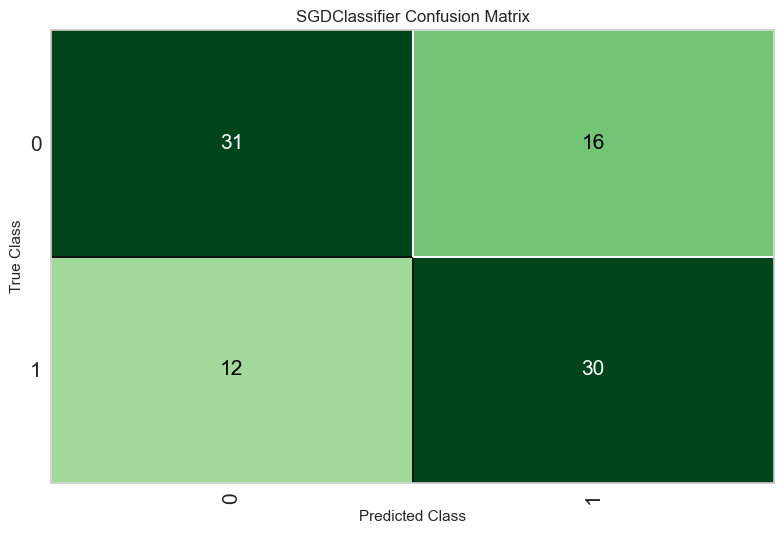

TypeError: AUC plot not available for estimators with no predict_proba attribute.

In [142]:
plot_model(estimator=model, plot='confusion_matrix')
plot_model(estimator=model, plot='auc')

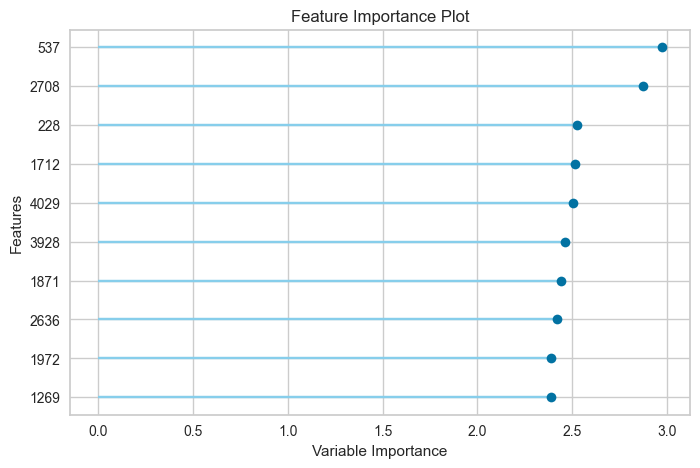

In [143]:
plot_model(estimator=model, plot='feature')

In [144]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [145]:
model_path = os.path.join(path, 'models', f'best_caret_{target}_{model_name}_{vectors}')
save_model(model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False,

In [146]:
exp_path = os.path.join(path, 'models', f'best_caret_{target}__{vectors}')
save_experiment(exp_path)

In [147]:
from pycaret.classification import  load_model
vectors = vectors
loaded_model = load_model(model_path)

Transformation Pipeline and Model Successfully Loaded


In [148]:
predicts = predict_model(loaded_model,test_vec)
predicts

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7374,0.7406,0.7193,0.8039,0.7593,0.4723,0.4759


,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,aggr,prediction_label
78,-0.024826,-0.013054,-0.002911,0.004642,-0.001678,-0.013565,0.003651,-0.009087,-0.007206,0.008072,...,-0.000431,-0.017242,-0.002247,-0.059479,0.004486,-0.020966,-0.002340,-0.007645,1,1
275,-0.013145,-0.022949,-0.013985,0.018997,0.019073,-0.031250,-0.014343,-0.009048,0.002007,0.013367,...,-0.026550,-0.021759,-0.006439,-0.059174,-0.023529,-0.002394,0.002310,-0.006676,0,0
247,-0.024750,-0.018448,0.012245,0.001254,0.007465,0.025040,-0.001491,-0.030884,0.010399,-0.002293,...,-0.007175,-0.008461,-0.020096,-0.047333,-0.008530,-0.016251,0.012039,0.014084,0,1
55,-0.013992,-0.021820,-0.007351,0.003176,0.028732,-0.008705,-0.012016,0.001756,0.001224,0.009071,...,-0.008308,-0.025864,0.004745,-0.047638,-0.029297,-0.023422,0.007721,0.022614,1,1
389,-0.013512,-0.046783,-0.009262,0.022858,0.005939,0.006916,0.002438,-0.001015,0.018478,-0.010880,...,-0.021896,0.025330,-0.003286,-0.048920,-0.005463,-0.000510,-0.014214,0.010002,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.005409,-0.034424,-0.020950,-0.003813,0.009911,0.011002,-0.010826,-0.002155,0.022949,-0.002283,...,-0.000871,0.000628,-0.035828,-0.018158,-0.009766,-0.005600,0.004002,0.020340,0,0
209,-0.033173,-0.018021,-0.009605,0.009438,-0.004040,0.020401,-0.003365,0.005188,0.009491,-0.014488,...,-0.014595,0.011055,-0.024017,-0.001822,-0.015480,-0.010971,-0.010033,0.019470,0,1
75,-0.011749,-0.029953,-0.015869,-0.013992,-0.003616,-0.012451,-0.017303,-0.000444,0.005955,-0.010078,...,-0.005276,-0.043091,-0.012428,-0.044861,-0.016296,-0.020477,-0.002243,0.013939,1,0
104,-0.025452,0.004704,0.018021,0.003956,0.006592,-0.011940,0.000239,-0.006496,0.006649,0.006142,...,-0.003452,0.008972,-0.010033,-0.093933,0.022598,-0.012108,-0.019150,0.028961,1,1


In [150]:
numbers = []
for i in range(len(test_vec)):
    if predicts[target].iloc[i] != predicts.prediction_label.iloc[i]:
        # print(predicts[target].iloc[i], predicts.prediction_label.iloc[i], test.iloc[i][["number", "출처"]])
        print(predicts[target].iloc[i], predicts.prediction_score.iloc[i], test.iloc[i][["number", "출처"]])
        numbers.append(test.iloc[i]["number"])

print(len(numbers),numbers)

0 1 number          21879
출처        강원특별자치도_강릉시
Name: 247, dtype: object
1 0 number       108405
출처        부산광역시_금정구
Name: 42, dtype: object
0 1 number       1872
출처        제주도_제주시
Name: 268, dtype: object
0 1 number          21696
출처        강원특별자치도_강릉시
Name: 274, dtype: object
1 0 number       84751
출처        광주광역시_동구
Name: 0, dtype: object
1 0 number      10316
출처        제주도_제주시
Name: 113, dtype: object
1 0 number          20230
출처        강원특별자치도_강릉시
Name: 155, dtype: object
1 0 number        81737
출처        부산광역시_금정구
Name: 73, dtype: object
1 0 number       152438
출처        부산광역시_금정구
Name: 25, dtype: object
1 0 number        82254
출처        부산광역시_금정구
Name: 72, dtype: object
1 0 number          19923
출처        강원특별자치도_강릉시
Name: 157, dtype: object
1 0 number       114493
출처        부산광역시_금정구
Name: 39, dtype: object
1 0 number       145689
출처        부산광역시_금정구
Name: 30, dtype: object
0 1 number       135083
출처        부산광역시_금정구
Name: 385, dtype: object
1 0 number       154400
출처        부산

In [24]:
pd.set_option("display.max_colwidth", None)

In [152]:
compare_set = set(
[21879, 108405, 6609, 18985, 21696, 84751, 10316, 20230, 81737, 82254, 22704, 19923, 114493, 145689, 135083, 154400, 140841, 36546, 3190, 1728, 105, 515100, 7123, 550386, 72860, 65411,
 64764, 21879, 108405, 1165, 21696, 84751, 10316, 81737, 152438, 82254, 19923, 114493, 135083, 154400, 140841, 36546, 3190, 1728, 105, 315, 95179, 550386, 65411
 ,71624, 21879, 108405, 6609, 1165, 21696, 10479, 3984, 10316, 20230, 96423, 81737, 152438, 19923, 114493, 96662, 145689, 135083, 154400, 140841, 36546, 3190, 1728, 65620, 515100, 7123, 66922, 550386,
 ]
)

# sample[sample.number.isin(compare_set-set(numbers))][
#     ["number", "text", "aggr", "욕설_모욕", "비꼼_시비", "요지불명", "저격성 민원", "len_text"]
# ]

sample[sample.number.isin(set(numbers)-compare_set)][
    ["number", "text", "aggr", "욕설_모욕", "비꼼_시비", "요지불명", "저격성 민원", "len_text"]
]

,number,text,aggr,욕설_모욕,비꼼_시비,요지불명,저격성 민원,len_text
209,22956,"#중앙시장 교통체증\n중앙시장 교통체증 관련하여 해결방안에 진심으로 신경써 주시길 바랍니다. 아시겠지만 중앙시장 입구 및 시장내 교통체증이 빈번합니다. 이유는 시장내 도로변 주차장에 주차하기 위하여 서행하고, 주차요원들이 주차 및 출차 우선을 이유로 주행차들의 진행을 막기 때문입니다. 재래시장 활성화를 위한다면 주차요원들의 의식개선 및 철저한 교육이 우선되어야 겠습니다. 하여 시에서는 어떤식으로 주차요원들의 교육이 진행되는지 공지 바랍니다. 그리고, 한가지 제안하자면 현재 금성로 옛 철둑길이 공원화 사업으로 진행되는것으로 압니다. 제가 볼때 공원화보다는 주차공간으로 전환하는것이 강릉시 재정 및 재래시장 활성화에 도움이 되지 않을까 생각합니다. 옛 철둑길에 주차장 또는 주차타워 설치 및 금성로(시장도로) 도로변 주차장은 제거 후 2차선 일방통행로로 사용시 원할한 차량통행이 이뤄질것으로 판단됩니다. 물론 주차장 또는 주차타워의 입구는 다른쪽에서 들어와야겠고, 출구는 금성로(중앙시장로)에서 빠지면 되겠지요. 참고로 첨부파일을 보시면 1, 2 두 곳 모두 또는 둘 중 한 곳 만이라도 주차장으로 이용하여 강릉시나 상인연합에서 운영한다면 재정확보에 많은 도움이 될것으로 판단되며, 교통체증 해결에도 많은 도움이 되리라 생각됩니다. 여하튼 시 발전을 위해 탁상공론보다는 직접 눈으로 확인하고 해결해주는 강릉시 공무원이 되시길 당부드립니다.",0,0,0,0,0,693
268,1872,#애완견목줄미착용 과태료등관리\n애완견 외출시 목줄 입마개착용은 법적으로도 나와있는걸로 알고있는데요 목줄을착용하지않은채 외출하는 애완견은 어덯게해야합니까 주인에게 목줄착용부탁을 해도 우리개는 안물어요 라는말뿐이고 동네공원을가도 엘리베이터를타도 올레길산책중에도 한라수목원산책길에서도 이해가가지않을만큼 ... 유기견이라면 그러려니할수있지만 주인이있는 애완견이면 문밖외출시 목줄착용은 기본인데 도무지 지켜지지않아 문의드립니다 개털알러지나 개공포증 달려드는개때문에 놀라는일등등 짓는소음문제도 그렇고 심각한듯한데요 도데체 어디로신고를해야하는지 신고관리는 어디서 하는건지?? 너무불편합니다,0,0,0,0,0,322
342,19164,"#동진버스, 정류장서 서지 않고 그냥 갔습니다.\n오늘 오후 대략 3시30분~42분 사이에 포남동 동남아파트 버스 정류장에서 공단가는 버스를 기다리는데 300번 동진버스가 그냥 지나가더군요. 버스가 엄청 빨리 달려 오고 있다는걸 느꼈습니다. 손을 들었지만 설수도 없는 상태였는지 그냥 지나쳐버렸습니다. 순식간에 지나가버려 번호판을 보고 싶었지만 볼수가 없었습니다. 너무 속상해서 회사에 전화도 해보았지만 무슨 소용있겠습니까. 이렇게 시청에 민원을 제기한다해도 고쳐지지는 않겠지만 그래도 속상한 마음을 표현해봅니다.",0,0,0,0,0,286


In [ ]:
135083
65411
95322
72860
3631
63047
96422
64764
1864
239
63521
145689
479588
95179
7123
6609
18985
3254
1165